## Activation

In [17]:
# Softmax
import numpy as np
vals = np.array([1,2,3, -1])

class ReLU:
    def forward(self, x):
        # return np.maximum(0, x)
        return np.where(x>0, x, 0)
    
    def backward(self, x):
        grad = np.zeros(x.shape)
        print(grad)
        grad = np.where(x>0, 1, 0)
        return grad
    
softmax_0 = np.exp(vals[2])/np.sum(np.exp(vals))
act = ReLU()
print(act.backward(vals))

print(softmax_0)


[0. 0. 0. 0.]
[1 1 1 0]
0.6572330228318555


In [8]:
import numpy as np
from collections import Counter

class KMeans:
    def __init__(self, k=2, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]
        
        for i in range(self.max_iterations):
            clusters = [[] for _ in range(self.k)]
            for x in X:
                # distances = np.linalg.norm(self.centroids - x, axis=1)
                distances = np.sqrt(np.sum((self.centroids - x)**2, axis=-1))
                cluster_index = np.argmin(distances)
                clusters[cluster_index].append(x)
            
            new_centroids = []
            for cluster in clusters:
                if len(cluster) > 0:
                    new_centroids.append(np.mean(cluster, axis=0))
                else:
                    new_centroids.append(self.centroids[clusters.index(cluster)])
            
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
            
        self.labels_ = np.zeros(len(X))
        for i, cluster in enumerate(clusters):
            for x in cluster:
                self.labels_[np.where(X == x)[0][0]] = i
                
        return self
    
    def predict(self, X):
        labels = np.zeros(len(X))
        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centroids - x, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def get_cluster_counts(self):
        return Counter(self.labels_)

In [25]:
class Kmeans():
    def __init__(self, k=2, iters=100):
        self.k = k
        self.iters = iters
        
    def fix(self, inputs):
        self.k_points = inputs[np.random.choice(len(inputs), self.k)]
        
        for iter in range(self.iters):
            self.clusters = [[] for _ in range(self.k)]
            for input in inputs:
                distance = np.sqrt(np.sum((self.k_points - input)**2, axis=-1))
                index = np.argmin(distance)
                self.clusters[index].append(input)
                
            new_points = []
            for cluster in self.clusters:
                new_points.append(np.mean(cluster, axis=0))
            self.k_points = new_points
        
        return self.k_points, self.clusters

            
                
                
                
    

In [26]:
import matplotlib.pyplot as plt

points = np.random.randn(100,2)
KM = Kmeans(4,20)
points, clusters = KM.fix(points)
plt.figure(figsize=(8, 6))

plt.scatter(points[:, 0], points[:, 1], c=clusters)
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title("K-means Clustering")
plt.show()


TypeError: list indices must be integers or slices, not tuple

<Figure size 800x600 with 0 Axes>

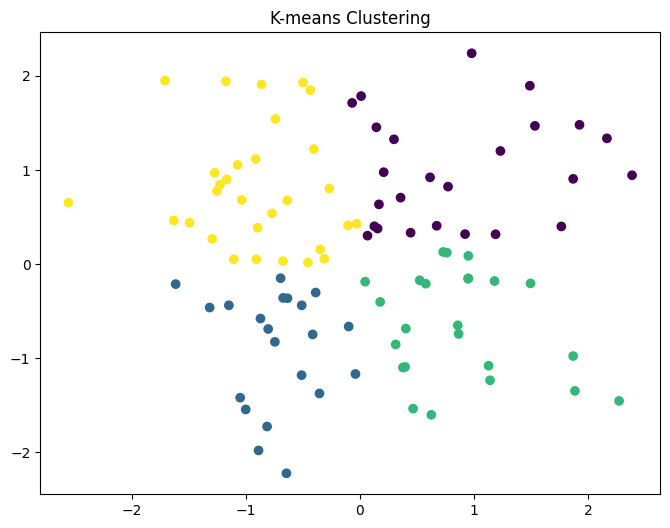

Cluster 0: 25 data points
Cluster 1: 21 data points
Cluster 2: 24 data points
Cluster 3: 30 data points


In [27]:
import numpy as np
import matplotlib.pyplot as plt


# 生成一些随机数据
np.random.seed(0)
# X1 = np.random.randn(100, 2) + np.array([5, 5])
# X2 = np.random.randn(100, 2) + np.array([-5, -5])
# X3 = np.random.randn(100, 2) + np.array([5, -5])
# X4 = np.random.randn(100, 2) + np.array([-5, 5])
# X = np.vstack([X1, X2, X3, X4])

X = np.random.randn(100,2)
# 使用K-means聚类算法
kmeans = KMeans(k=4)
kmeans.fit(X)

# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title("K-means Clustering")
plt.show()

# 输出每个簇中数据点的数量
cluster_counts = kmeans.get_cluster_counts()
for i in range(kmeans.k):
    print(f"Cluster {i}: {cluster_counts[i]} data points")

## LR

In [31]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # 初始化权重和偏差
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        # 梯度下降优化
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw.reshape(-1, 1)
            self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# 生成一些随机数据
np.random.seed(0)
X = np.random.randn(100, 1)
y = 2*X + 1 + np.random.randn(100, 1)

# 训练模型
model = LinearRegression(lr=0.1, n_iters=1000)
model.fit(X, y)

# 预测新数据
X_new = np.array([[2], [3]])
y_new = model.predict(X_new)

# 绘制训练数据和拟合直线
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='r')
plt.show()

print("预测值：")
print(y_new)

TypeError: Cannot interpret '1' as a data type